In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("e1", "r") as f:
    ref = f.readlines()
    
ref = [[int(x) for x in row.strip()] for row in ref[2:]]
ref = np.array(ref)

In [3]:
correct_for_each_contestant = np.sum(ref, axis=1)

In [4]:
correct_for_each_question = np.sum(ref, axis=0)

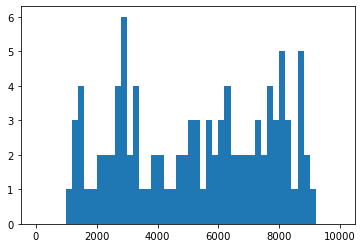

In [5]:
plt.hist(correct_for_each_contestant, bins=np.linspace(0,10000,51))
plt.show()

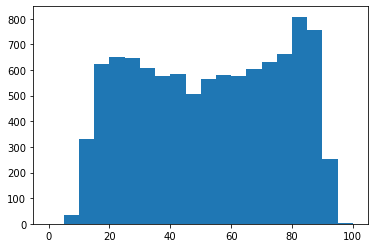

In [6]:
plt.hist(correct_for_each_question, bins=np.linspace(0,100,21))
plt.show()

In [7]:
ref

array([[0, 0, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 0, 1]])

In [8]:
# estimate the difficulty of each question
# estimate the skill_level of each participant
# logloss

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logloss(pred, ref):
    assert pred.shape == ref.shape
    return (1-ref)*np.log(1-pred) + (ref)*np.log(pred)

In [15]:
skills = np.zeros(100)
difficulties = np.zeros(10000)

In [16]:
def loss_of_skill_estimate(skill, difficulties, result):
    preds = sigmoid(skill-difficulties)
    return sum(logloss(preds, result))

def loss_of_difficulty_estimate(skills, difficulty, result):
    preds = sigmoid(skills-difficulty)
    return sum(logloss(preds, result))

In [17]:
loss_of_skill_estimate(2, difficulties, ref[2]), \
loss_of_skill_estimate(0, difficulties, ref[2]), \
loss_of_skill_estimate(-2, difficulties, ref[2])

(-7889.28011042822, -6931.471805600547, -14649.280110427957)

In [18]:
loss_of_difficulty_estimate(skills, -2, ref[:,2]), \
loss_of_difficulty_estimate(skills, 0, ref[:,2]), \
loss_of_difficulty_estimate(skills, 2, ref[:,2])

(-58.69280110429716, -69.31471805599459, -166.69280110429722)

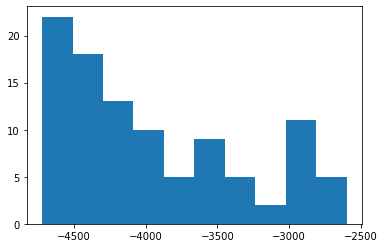

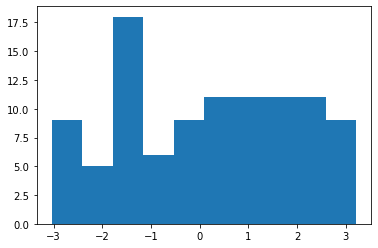

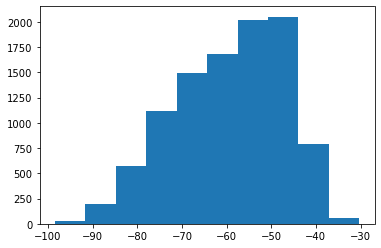

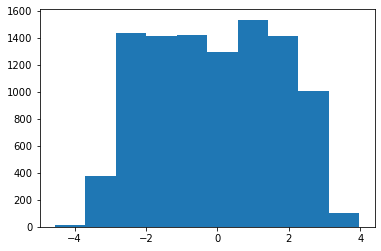

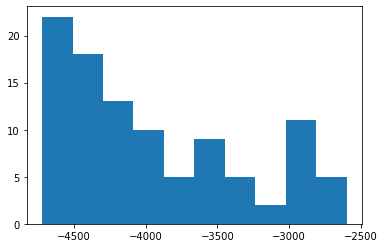

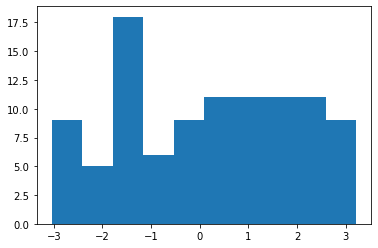

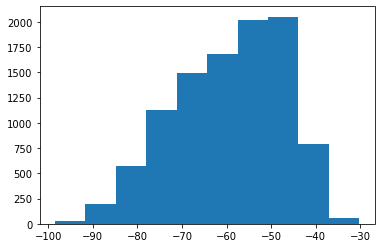

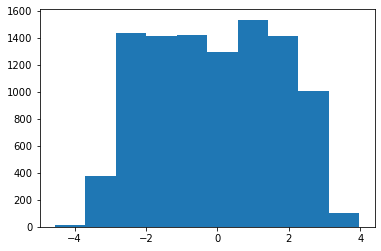

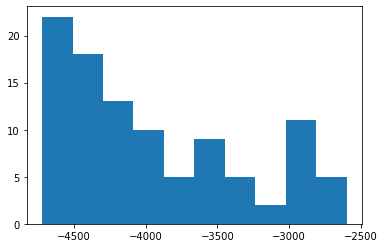

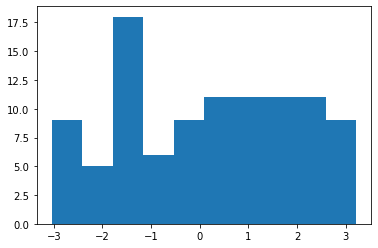

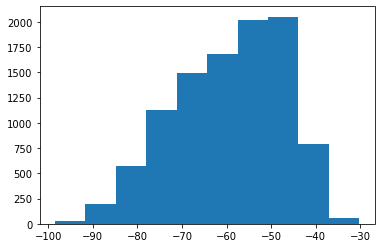

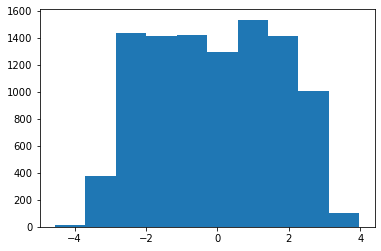

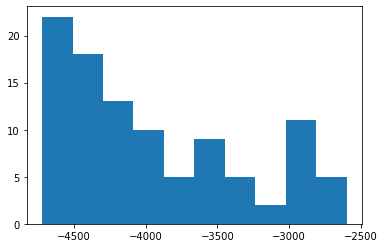

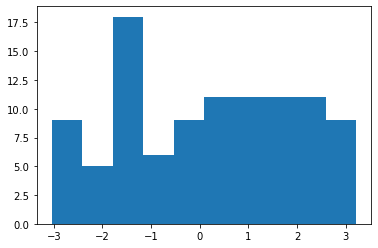

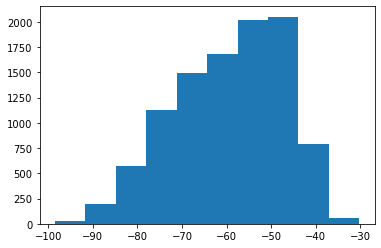

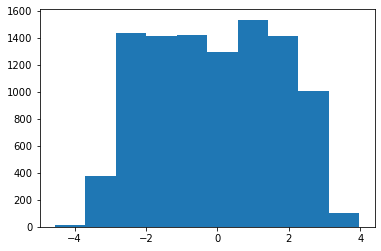

In [101]:
for _ in range(4):
    new_skills = []
    for result in ref:

        def loss_of_skill_estimate_opt(skill):
            return -loss_of_skill_estimate(skill, difficulties, result)

        new_skills.append(minimize(loss_of_skill_estimate_opt, 0).x[0])

    skills = np.array(new_skills)
    
    plt.hist([loss_of_skill_estimate(skill, difficulties, result) 
          for result, skill in zip(ref, skills)])
    plt.show()
    plt.hist(skills)
    plt.show()
    
    
    new_difficulties = []
    for result in ref.transpose():

        def loss_of_difficulty_estimate_opt(difficulty):
            return -loss_of_difficulty_estimate(skills, difficulty, result)

        new_difficulties.append(minimize(loss_of_difficulty_estimate_opt, 0).x[0])

    difficulties = np.array(new_difficulties)
    
    plt.hist([loss_of_difficulty_estimate(skills, difficulty, result) 
          for result, skill in zip(ref.transpose(), difficulties)])
    plt.show()
    plt.hist(difficulties)
    plt.show()